# Week 1 - Univariate linear regression

This week, we will use **univariate linear regression** to make predictions. We will work with weather data collected from the station in Potsdam.


## Dataset

The dataset consists of weather data recorded in Potsdam over the years. It includes measurements such as:

- Maximum temperature
- Minimum temperature
- Precipitation
- Snow depth
- Average temperature

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Belowe is the function to load the dataset: 

In [ ]:

YEAR = 1900
def load_weather_data(year = None):
    """
    load data from a weather station in Potsdam
    
    """

    names = ['station', 'date' , 'type', 'measurement', 'e1','e2', 'E', 'e3']
    data = pd.read_csv('../datasets/weatherstations/GM000003342.csv', names = names, low_memory=False) # 47876 rows, 8 columns
    # convert the date column to datetime format
    data['date'] = pd.to_datetime(data['date'], format="%Y%m%d") # 47876 unique days
    types = data['type'].unique()

    tmax = data[data['type']=='TMAX'][['date','measurement']] # Maximum temperature (tenths of degrees C), 47876
    tmin = data[data['type']=='TMIN'][['date','measurement']] # Minimum temperature (tenths of degrees C), 47876
    prcp = data[data['type']=='PRCP'][['date','measurement']] # Precipitation (tenths of mm), 47876
    snwd = data[data['type']=='SNWD'][['date','measurement']] # Snow depth (mm), different shape
    tavg = data[data['type']=='TAVG'][['date','measurement']] # average temperature, different shape 1386
    arr = np.array([tmax.measurement.values,tmin.measurement.values, prcp.measurement.values]).T 

    df = pd.DataFrame(arr/10.0, index=tmin.date, columns=['TMAX', 'TMIN', 'PRCP']) # compile data in a dataframe and convert temperatures to degrees C, precipitation to mm

    if year is not None:
        df = df[pd.to_datetime(f'{year}-1-1'):pd.to_datetime(f'{year}-12-31')]
    
    df['days'] = (df.index - df.index.min()).days
    return df

Now, let's examine the data for the year 2000:

/tmp/ipykernel_6756/2278966457.py:9: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../datasets/weatherstations/GM000003342.csv', names = names)


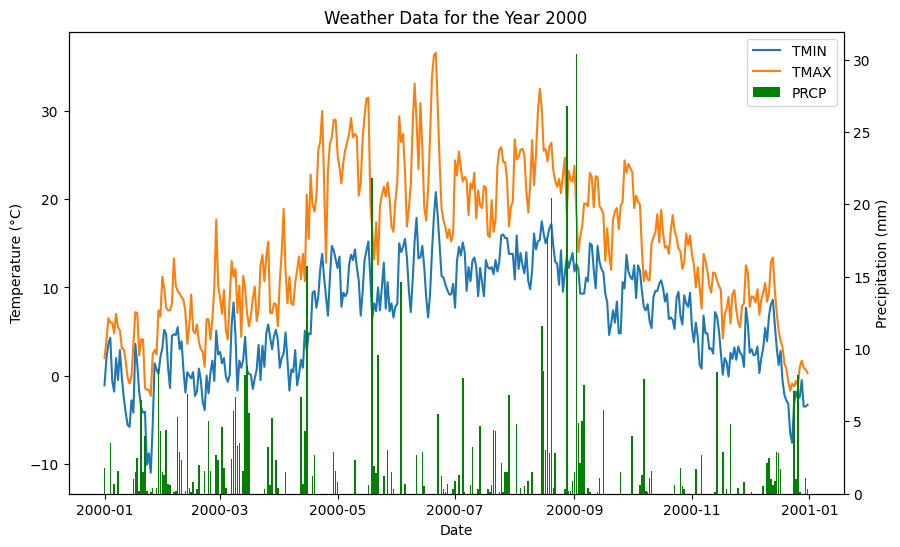

In [23]:
# Load weather data for the year 2000
df_2000 = load_weather_data(year=2000)

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot temperature data on primary axis
ax1.plot(df_2000.index, df_2000['TMIN'], label='TMIN')
ax1.plot(df_2000.index, df_2000['TMAX'], label='TMAX')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)')

# Create secondary axis for precipitation
ax2 = ax1.twinx()
ax2.bar(df_2000.index, df_2000['PRCP'], label='PRCP', color='g')
ax2.set_ylabel('Precipitation (mm)')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2)

plt.title('Weather Data for the Year 2000')
plt.show()

## Task

## Task

The task is to use the day number in a year as an input and predict the maximum temperature ($t_{max}$) for the given day. We will use linear regression in the following form:

$$
t_{max} = w \cdot \text{day} + b
$$

Where:
- $t_{max}$ is the maximum temperature for a given day
- $w$ is the slope (temperature change per day)
- $b$ is the intercept (base temperature)
- $day$ is the day number in the year (0-365)


## Loss function and learning algorithm

We will minimize the following loss function, which measures the dissimilarity between the model's predictions and the actual values:

$$
\text{mse} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:
- $y_i$ is the actual value
- $\hat{y}_i$ is the predicted value
- $n$ is the number of data points

The values of parameters $b$ and $w$ that minimize this function are given by:

$$
w = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

$$
b = \bar{y} - w \cdot \bar{x}
$$

Where:
- $x_i$ and $y_i$ are the data points
- $\bar{x}$ and $\bar{y}$ are the means of $x$ and $y$ respectively

## Implementing Univariate Linear Regression

We will implement Univariate Linear Regression class by creating the following methods:

1. `train()` – to train the model and find the optimal parameters $w$ and $b$.
2. `predict()` – to make predictions using the trained model.
3. `score()` – to evaluate the model's performance using the Mean Squared Error (MSE).

In [14]:
class UnivariateLinearRegression:
    def __init__(self):
        self.x = None
        self.y = None
        self.w = None
        self.b = None
        
    def train(self, x, y):
        self.x = x
        self.y = y
        self.w = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)
        self.b = np.mean(y) - self.w * np.mean(x)

    def pred(self, x):
        y = self.w * x + self.b
        return y
    
    def mse(self, x=None, y=None):
        if x is None:
            x = self.x
        if y is None:
            y = self.y
        y_pred = self.pred(x)
        mse = np.mean((y - y_pred)**2)
        return mse
    
    def score(self, x=None, y=None):
        return -self.mse(x, y)



## Training the Model and Plotting the Regression Line

Now that we have the dataset and the model class, we can train the model on the temperature data and plot the regression line. 

**Note:** While our model is based on a linear equation, the data itself is non-linear. However, we will see that the linear model can still capture the underlying trend in the data. 

In the next week, we will implement a linear regression model that can handle non-linear data.


/tmp/ipykernel_6756/3406483552.py:8: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../datasets/weatherstations/GM000003342.csv', names = names)


training MSE : 56.6761
test MSE     : 75.6696


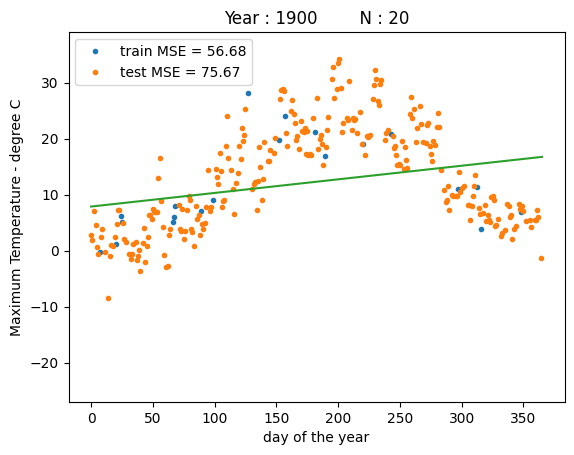

In [ ]:



df = load_weather_data(year = YEAR)


np.random.seed(2)
idx = np.random.permutation(df.shape[0])

idx_train = idx[0:100]
idx_test = idx[100:]

data_train = df.iloc[idx_train]
data_test = df.iloc[idx_test]

def plot_regression(N_train = 10):
    x_train = data_train.days.values[:N_train] * 1.0
    y_train = data_train.TMAX.values[:N_train]

    reg = UnivariateLinearRegression()
    reg.train(x_train, y_train)

    x_days = np.arange(366)
    y_days_pred = reg.pred(x_days)

    x_test = data_test.days.values * 1.0
    y_test = data_test.TMAX.values
    y_test_pred = reg.pred(x_test)
    print("training MSE : %.4f" % reg.mse())
    print("test MSE     : %.4f" % reg.mse(x_test, y_test))

    fig = plt.figure()
    plt.plot(x_train,y_train,'.')
    plt.plot(x_test,y_test,'.')
    plt.legend(["Train MSE = %.2f" % reg.mse(),"Test MSE = %.2f" % reg.mse(x_test, y_test)])
    plt.plot(x_days,y_days_pred)
    plt.ylim([-27,39])
    plt.xlabel("Day of the year")
    plt.ylabel("Maximum Temperature - Degree C")
    plt.title("Year : %i        N : %i" % (YEAR, N_train))
    plt.grid(True)
    return (fig, reg)

N = 20
fig, reg = plot_regression(N)
plt.show()